In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from glob import glob

In [3]:
ls data\crop

 Volume in drive D is DATA
 Volume Serial Number is FAA9-24C8

 Directory of D:\FaceRecognition\data\crop

19-05-2021  15:34    <DIR>          .
19-05-2021  15:34    <DIR>          ..
19-05-2021  15:40    <DIR>          female_crop
19-05-2021  15:42    <DIR>          male_crop
               0 File(s)              0 bytes
               4 Dir(s)  290,930,757,632 bytes free


In [6]:
female=glob('./data/crop/female_crop/*.png')
male=glob('./data/crop/male_crop/*.png')

In [9]:
path=female+male

In [10]:
path

['./data/crop/female_crop\\female_0.png',
 './data/crop/female_crop\\female_1.png',
 './data/crop/female_crop\\female_10.png',
 './data/crop/female_crop\\female_100.png',
 './data/crop/female_crop\\female_1000.png',
 './data/crop/female_crop\\female_1002.png',
 './data/crop/female_crop\\female_1003.png',
 './data/crop/female_crop\\female_1006.png',
 './data/crop/female_crop\\female_1008.png',
 './data/crop/female_crop\\female_1009.png',
 './data/crop/female_crop\\female_101.png',
 './data/crop/female_crop\\female_1010.png',
 './data/crop/female_crop\\female_1011.png',
 './data/crop/female_crop\\female_1014.png',
 './data/crop/female_crop\\female_1017.png',
 './data/crop/female_crop\\female_1018.png',
 './data/crop/female_crop\\female_1019.png',
 './data/crop/female_crop\\female_102.png',
 './data/crop/female_crop\\female_1020.png',
 './data/crop/female_crop\\female_1021.png',
 './data/crop/female_crop\\female_1022.png',
 './data/crop/female_crop\\female_1024.png',
 './data/crop/female_

In [11]:
path[::-1]

['./data/crop/male_crop\\male_998.png',
 './data/crop/male_crop\\male_993.png',
 './data/crop/male_crop\\male_992.png',
 './data/crop/male_crop\\male_991.png',
 './data/crop/male_crop\\male_986.png',
 './data/crop/male_crop\\male_983.png',
 './data/crop/male_crop\\male_982.png',
 './data/crop/male_crop\\male_981.png',
 './data/crop/male_crop\\male_980.png',
 './data/crop/male_crop\\male_975.png',
 './data/crop/male_crop\\male_973.png',
 './data/crop/male_crop\\male_971.png',
 './data/crop/male_crop\\male_970.png',
 './data/crop/male_crop\\male_968.png',
 './data/crop/male_crop\\male_967.png',
 './data/crop/male_crop\\male_966.png',
 './data/crop/male_crop\\male_964.png',
 './data/crop/male_crop\\male_963.png',
 './data/crop/male_crop\\male_961.png',
 './data/crop/male_crop\\male_96.png',
 './data/crop/male_crop\\male_959.png',
 './data/crop/male_crop\\male_956.png',
 './data/crop/male_crop\\male_955.png',
 './data/crop/male_crop\\male_954.png',
 './data/crop/male_crop\\male_952.png',
 

In [12]:
#getting size of image
#PIL is python image library
img= Image.open(path[0])

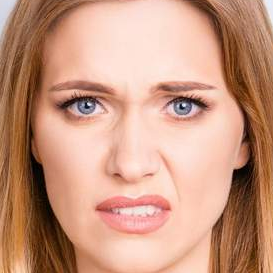

In [13]:
img

In [14]:
img.size

(273, 273)

In [22]:
def getSize(path):
    img=Image.open(path)
    return img.size[0]

In [23]:
getSize(path[900])

410

In [24]:
# Most of the images are square matrix so lets retireve only one dimensions, changig getSize function

In [25]:
#PANDAS is also known as panel datasets
df=pd.DataFrame(data=path,columns=['path'])

In [26]:
df.head()

,path
0,./data/crop/female_crop\female_0.png
1,./data/crop/female_crop\female_1.png
2,./data/crop/female_crop\female_10.png
3,./data/crop/female_crop\female_100.png
4,./data/crop/female_crop\female_1000.png


In [27]:
df.tail()

,path
1821,./data/crop/male_crop\male_986.png
1822,./data/crop/male_crop\male_991.png
1823,./data/crop/male_crop\male_992.png
1824,./data/crop/male_crop\male_993.png
1825,./data/crop/male_crop\male_998.png


In [28]:
df.shape

(1826, 1)

In [30]:
df['size']=df['path'].apply(getSize)

In [31]:
df.head()

,path,size
0,./data/crop/female_crop\female_0.png,273
1,./data/crop/female_crop\female_1.png,182
2,./data/crop/female_crop\female_10.png,182
3,./data/crop/female_crop\female_100.png,54
4,./data/crop/female_crop\female_1000.png,54


In [33]:
df.tail()

,path,size
1821,./data/crop/male_crop\male_986.png,410
1822,./data/crop/male_crop\male_991.png,182
1823,./data/crop/male_crop\male_992.png,615
1824,./data/crop/male_crop\male_993.png,182
1825,./data/crop/male_crop\male_998.png,81


In [34]:
#EDA

In [35]:
df.describe()

,size
count,1826.000000
mean,220.556955
std,188.481521
min,24.000000
25%,122.000000
50%,182.000000
75%,273.000000
max,2076.000000


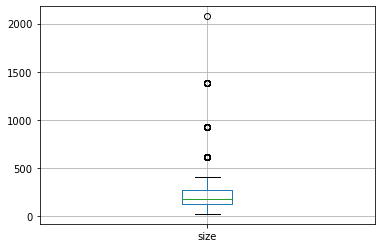

In [38]:
df.boxplot(['size'])

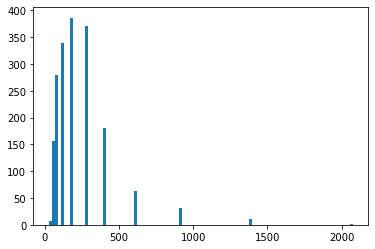

In [42]:
plt.hist(df['size'],bins=100)
plt.show()

In [43]:
# By seeing graphics, we will ignore images below 60 size, and
# resizing will be done to 100*100 form

In [48]:
df.shape

(1826, 2)

In [49]:
df_new=df[df['size']>60]

In [45]:
len(df['size'])

1826

In [50]:
df_new.shape

(1662, 2)

In [51]:
df_new['path'][0]

'./data/crop/female_crop\\female_0.png'

In [55]:
string=df_new['path'][0]
string.split('_')[0].split('/')[-1]

'female'

In [56]:
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [57]:
df['gender']=df['path'].apply(gender)

In [59]:
df['gender'].value_counts()

female    1109
male       717
Name: gender, dtype: int64

In [60]:
df_new['gender']=df_new['path'].apply(gender)

<ipython-input-60-a2a331e70cdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender']=df_new['path'].apply(gender)


In [61]:
df_new['gender'].value_counts()

female    1009
male       653
Name: gender, dtype: int64

female    0.6071
male      0.3929
Name: gender, dtype: float64


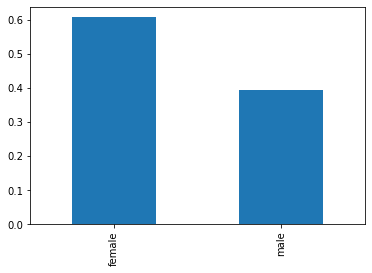

In [66]:
print(df_new['gender'].value_counts(normalize=True))
df_new['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [67]:
# From analysis we get that there are 60.71% female pics and 39.29% are male

In [68]:
df_new['size'].min()

81

In [69]:
# all the image size is more than 80

In [70]:
#conclusion: Resizing all the image in df_new to 100x 100 array

In [71]:
### Resizing Image

In [72]:
df_new.head()

,path,size,gender
0,./data/crop/female_crop\female_0.png,273,female
1,./data/crop/female_crop\female_1.png,182,female
2,./data/crop/female_crop\female_10.png,182,female
5,./data/crop/female_crop\female_1002.png,273,female
6,./data/crop/female_crop\female_1003.png,122,female


In [75]:
path_to_resize=df_new['path'][0]
# read the image,convert to grayscale,resize into 100x100 array,
#flattening the image(1*10000)

In [76]:
path_to_resize

'./data/crop/female_crop\\female_0.png'

In [77]:
path_to_resize=df_new['path'][0]
img=cv2.imread(path_to_resize)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
size=gray.shape[0]
if size>=100:
    gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA)# SHRINKING
else:
    gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)# ENLARGING

    flat_img=gray_re.flatten()

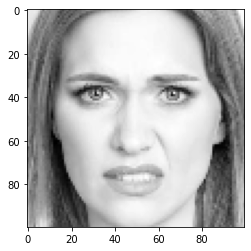

In [79]:
plt.imshow(gray_re,cmap='gray')

In [86]:
# puttinig in function
def resize_img(path_to_resize):
    try:
        img=cv2.imread(path_to_resize)

        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        size=gray.shape[0]
        if size>=100:
            gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA)# SHRINKING
        else:
            gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)# ENLARGING

        flat_img=gray_re.flatten()
        return flat_img
    except:
        return None

In [87]:
len(resize_img(path[125]))

10000

In [88]:
df_new.head()

,path,size,gender
0,./data/crop/female_crop\female_0.png,273,female
1,./data/crop/female_crop\female_1.png,182,female
2,./data/crop/female_crop\female_10.png,182,female
5,./data/crop/female_crop\female_1002.png,273,female
6,./data/crop/female_crop\female_1003.png,122,female


In [89]:
#structuring function
df_new['sturcutred_data']=df_new['path'].apply(resize_img)

<ipython-input-89-f03ea9d7a913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sturcutred_data']=df_new['path'].apply(resize_img)


In [90]:
df_new.head()

,path,size,gender,sturcutred_data
0,./data/crop/female_crop\female_0.png,273,female,"[217, 217, 217, 218, 215, 204, 155, 111, 150, ..."
1,./data/crop/female_crop\female_1.png,182,female,"[187, 173, 164, 160, 160, 169, 166, 124, 74, 7..."
2,./data/crop/female_crop\female_10.png,182,female,"[107, 132, 140, 149, 136, 133, 124, 111, 105, ..."
5,./data/crop/female_crop\female_1002.png,273,female,"[65, 48, 49, 67, 58, 47, 79, 69, 43, 49, 50, 4..."
6,./data/crop/female_crop\female_1003.png,122,female,"[178, 177, 174, 171, 166, 165, 166, 167, 168, ..."


In [93]:
df_new.shape

(1662, 4)

In [95]:
#Copy and expand their columns

df1=df_new['sturcutred_data'].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,217,217,217,218,215,204,155,111,150,130,...,102,85,80,108,81,124,158,171,179,194
1,187,173,164,160,160,169,166,124,74,74,...,103,112,121,113,102,99,86,62,57,55
2,107,132,140,149,136,133,124,111,105,96,...,94,108,106,109,105,117,113,81,76,72
5,65,48,49,67,58,47,79,69,43,49,...,104,106,114,121,129,146,161,172,162,154
6,178,177,174,171,166,165,166,167,168,165,...,61,12,27,30,24,22,19,21,30,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,133,134,134,134,133,135,135,135,135,137,...,73,179,119,105,94,49,48,44,43,42
1822,126,79,64,71,62,51,60,61,53,61,...,101,102,106,105,102,103,98,121,121,123
1823,51,36,39,36,33,27,29,35,35,19,...,139,140,140,140,139,140,140,139,139,139
1824,233,233,233,233,234,233,229,222,195,189,...,47,46,31,21,21,22,22,23,23,29


In [96]:
df1.shape

(1662, 10000)

In [97]:
df2=pd.concat((df_new['gender'],df1),axis=1)

In [98]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,217,217,217,218,215,204,155,111,150,...,102,85,80,108,81,124,158,171,179,194
1,female,187,173,164,160,160,169,166,124,74,...,103,112,121,113,102,99,86,62,57,55
2,female,107,132,140,149,136,133,124,111,105,...,94,108,106,109,105,117,113,81,76,72
5,female,65,48,49,67,58,47,79,69,43,...,104,106,114,121,129,146,161,172,162,154
6,female,178,177,174,171,166,165,166,167,168,...,61,12,27,30,24,22,19,21,30,32


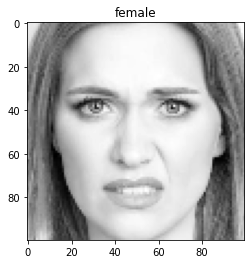

In [107]:
plt.imshow(df2.iloc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title(df2.iloc[0]['gender'])
plt.show()

In [108]:
#Saving the df2 data frame
import pickle

In [109]:
pickle.dump(df2,open('./data/dataframe_image_100x100.pickle','wb'))